SVM

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [211]:
##Create fake data where y=5+2*x1+3*x2
x=np.array([[1,7],[2,8],[3,8],[5,1],[6,-1],[7,3]])
y=np.array([[1,1,1,-1,-1,-1]]).T
print(x.shape,y.shape)

(6, 2) (6, 1)


(array([3., 0., 0., 0., 0., 0., 0., 0., 0., 3.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

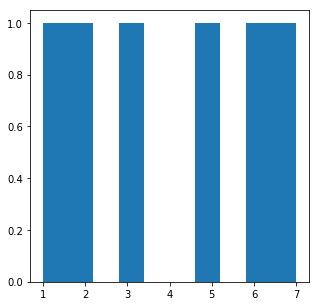

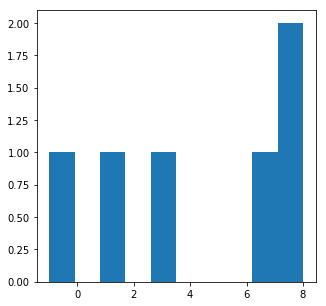

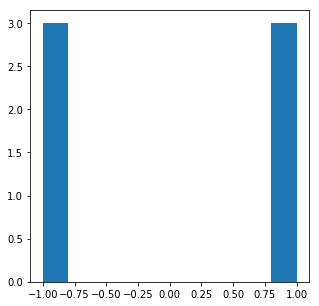

In [212]:
##Plot the data 
i=0
fig,ax=plt.subplots(figsize = (5,5))
ax.hist(x[:,0])
fig,ax=plt.subplots(figsize = (5,5))
ax.hist(x[:,1])
fig,ax=plt.subplots(figsize = (5,5))
ax.hist(y)

In [223]:
#Possible Transformations
transforms=[[1,1],[-1,1],[-1,-1],[1,-1]]
#Initialize the convex optimisation 
max_feature_value=np.amax(x)
min_feature_value=np.amin(x)
opt_dic={}
w_learning_rate=max_feature_value*0.001
b_range=5
b_learning_rate=5
latest_optimum=max_feature_value*0.1
w=np.array([latest_optimum,latest_optimum])
finish=False
# Heuristic
while not finish:
    for b in np.arange(-1*max_feature_value*b_range,max_feature_value*b_range,step*b_learning_rate):
        #Try all the possible transformation
        for transfo in transforms:
            #w next is actually the weigths can match with transfo the constraint. 
            w_next=w*transfo
            classified=True
            #Try to see which data is where, based on the weights 
            for feature in x.T:
                for i in range(6):
                    yi=y[i,0]
                    #We want to satisfy the constraint y(w*x+b)>=1
                    if not yi*(np.dot(np.array([w_next]),x[i,:])+b)>=1:
                        classified=False
            #If the constraint is satisfied, then the solution proposed is an eligible solution
            if classified is True:
                opt_dic[np.linalg.norm(w_next)]=[w_next,b]
    # We stop if w_propose <0 because if you look at the transformation , 
    # we would do the same thing but in opposite direction. Yhus it is useless to go further
    # otherwhise we update w with 
    if w[0]<0:
        finish=True
    else:
        w=w-w_learning_rate
norms=sorted([n for n in opt_dic])
# we want to satisfy the objectibe function : min of ||w||
opt_choice = opt_dic[norms[0]]
w_final=opt_choice[0]
b_final=opt_choice[1]
latest_optimum=opt_choice[0][0]+step*2
classification = np.sign(np.dot(np.array(x),w_final)+b_final)

In [224]:
print(classification)

[ 1.  1.  1. -1. -1. -1.]


In [225]:
accuracy=(classification==y[:,0]).sum()/len(y)
print("Accuracy:",accuracy,"%")

Accuracy: 1.0 %


In [226]:
predict=np.dot(np.array(x),w_final)+b_final

In [227]:
print(predict)

[ 1.536  1.536  1.28  -1.024 -1.792 -1.024]
